In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.arima.model import ARIMA

In [2]:
df = pd.read_csv("CPI_PPI_All_Commodity.csv")


In [3]:
df_mod = df.copy()
df_mod.head()

DATE CPIAUCSL_NBD19470101  PPIACO_NBD19470101
0  1913-01-01                    .            49.38776
1  1913-02-01                    .            48.97959
2  1913-03-01                    .            48.97959
3  1913-04-01                    .            48.97959
4  1913-05-01                    .            48.57143

In [4]:
df.head()

DATE CPIAUCSL_NBD19470101  PPIACO_NBD19470101
0  1913-01-01                    .            49.38776
1  1913-02-01                    .            48.97959
2  1913-03-01                    .            48.97959
3  1913-04-01                    .            48.97959
4  1913-05-01                    .            48.57143

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   DATE                  1337 non-null   object 
 1   CPIAUCSL_NBD19470101  1337 non-null   object 
 2   PPIACO_NBD19470101    1337 non-null   float64
dtypes: float64(1), object(2)
memory usage: 31.5+ KB


In [6]:
# rename the columns of the dataframe
df_mod.rename(columns={'DATE': 'Date', 'CPIAUCSL_NBD19470101': 'CPI', 'PPIACO_NBD19470101': 'PPI'}, inplace=True)
df_mod.head()

Date CPI       PPI
0  1913-01-01   .  49.38776
1  1913-02-01   .  48.97959
2  1913-03-01   .  48.97959
3  1913-04-01   .  48.97959
4  1913-05-01   .  48.57143

In [7]:
df_mod.isnull().sum()

Date    0
CPI     0
PPI     0
dtype: int64

In [8]:
df_mod[df_mod['CPI']=='.'].value_counts().sum()

408

In [9]:
df_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1337 non-null   object 
 1   CPI     1337 non-null   object 
 2   PPI     1337 non-null   float64
dtypes: float64(1), object(2)
memory usage: 31.5+ KB


In [10]:
df_mod['CPI'] = df_mod['CPI'].replace('.', np.nan)
df_mod.dropna(subset=['CPI', 'PPI'], inplace=True)

In [11]:
df_mod

Date         CPI         PPI
408   1947-01-01   100.00000   100.00000
409   1947-02-01   100.65177   100.81633
410   1947-03-01   102.42086   103.26531
411   1947-04-01   102.42086   102.44898
412   1947-05-01   102.18808   102.04082
...          ...         ...         ...
1332  2024-01-01  1441.73650  1025.73878
1333  2024-02-01  1448.10987  1040.46531
1334  2024-03-01  1453.58473  1041.28980
1335  2024-04-01  1458.13315  1049.60408
1336  2024-05-01  1458.21695  1040.69796

[929 rows x 3 columns]

In [12]:
# convert the data to datetime dtype
df_mod['Date'] = pd.to_datetime(df_mod['Date'])
df_mod = df_mod[df_mod['Date']>'2019-01-01']
df_cpi = df_mod.copy()
# set date as index
df_mod.set_index('Date', inplace=True)
df_mod.head()


CPI        PPI
Date                             
2019-02-01  1179.32495  813.06122
2019-03-01  1183.78492  819.59184
2019-04-01  1188.23557  824.89796
2019-05-01  1188.52886  823.26531
2019-06-01  1188.14246  817.55102

In [13]:
df_mod.shape

(64, 2)

In [14]:
df_mod.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 64 entries, 2019-02-01 to 2024-05-01
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CPI     64 non-null     object 
 1   PPI     64 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.5+ KB


In [15]:
df_mod['CPI'] = df_mod['CPI'].astype('float64')

/var/folders/bf/jskpgkr57cl65bh_6c8692140000gn/T/ipykernel_8202/2421730002.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mod['CPI'] = df_mod['CPI'].astype('float64')


In [16]:
df_mod.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 64 entries, 2019-02-01 to 2024-05-01
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CPI     64 non-null     float64
 1   PPI     64 non-null     float64
dtypes: float64(2)
memory usage: 1.5 KB


In [17]:
cpi = df_mod['CPI']
ppi = df_mod['PPI']
# Drop NaN values after rate calculation
df_mod.dropna(subset=['CPI', 'PPI'], inplace=True)

/var/folders/bf/jskpgkr57cl65bh_6c8692140000gn/T/ipykernel_8202/4100637962.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mod.dropna(subset=['CPI', 'PPI'], inplace=True)


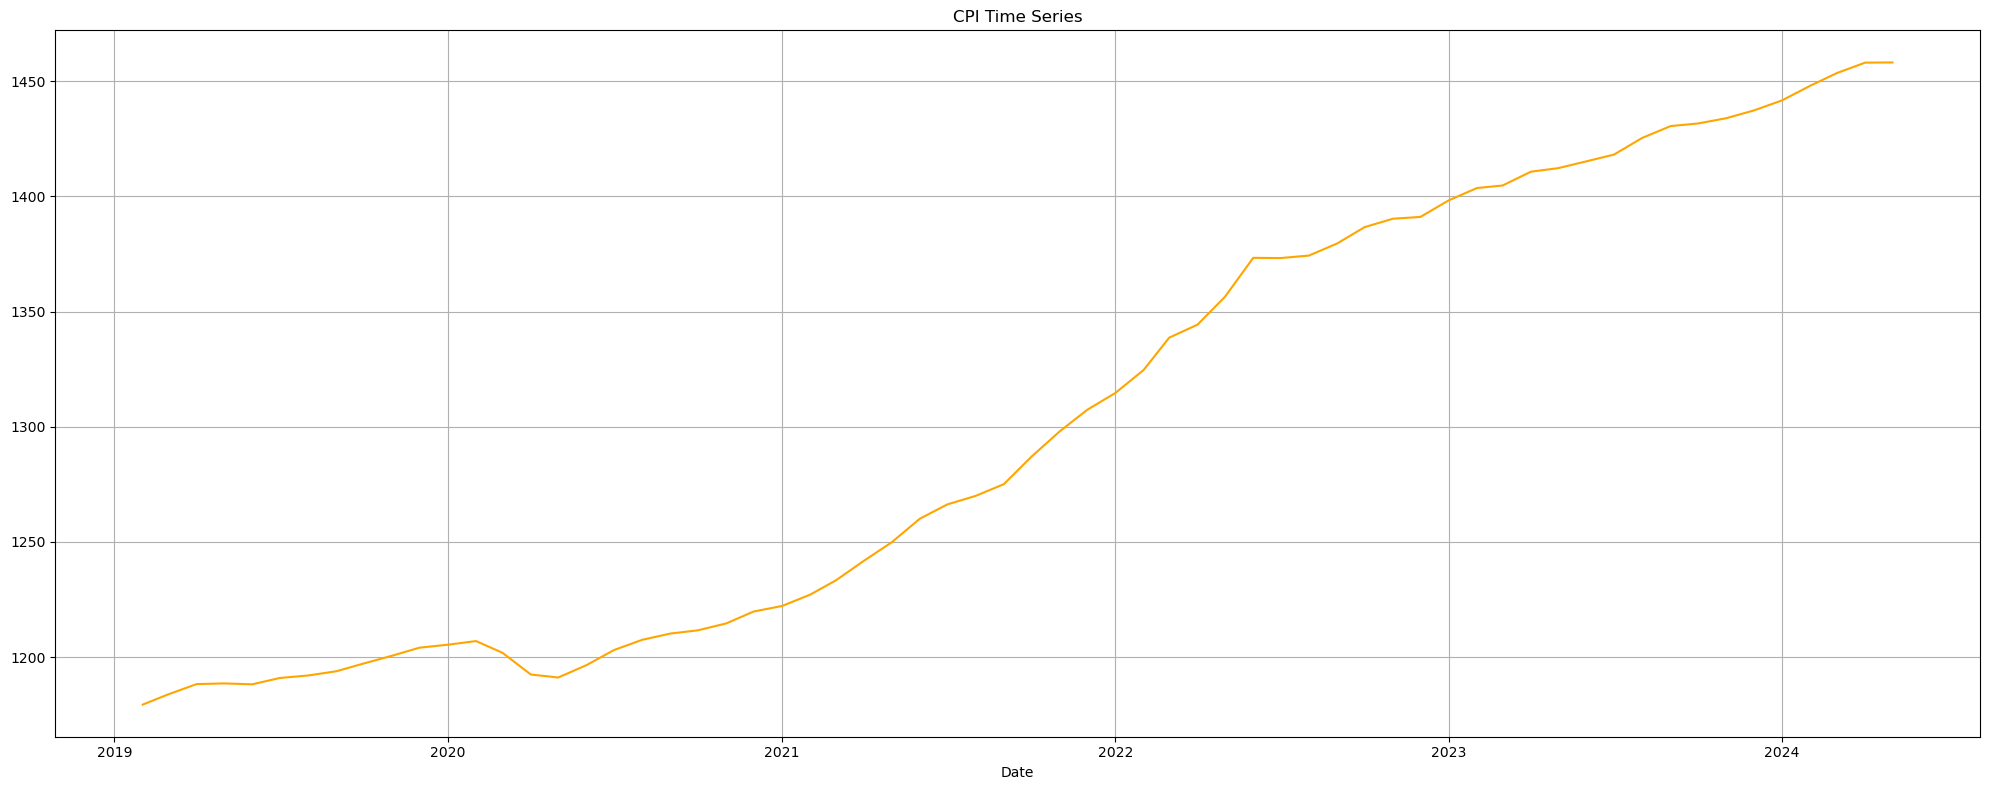

In [18]:

plt.figure(figsize=(20, 8))
plt.plot(cpi, color = "orange")
plt.title('CPI Time Series')
plt.xlabel('Date')
plt.grid(True)
plt.tight_layout()


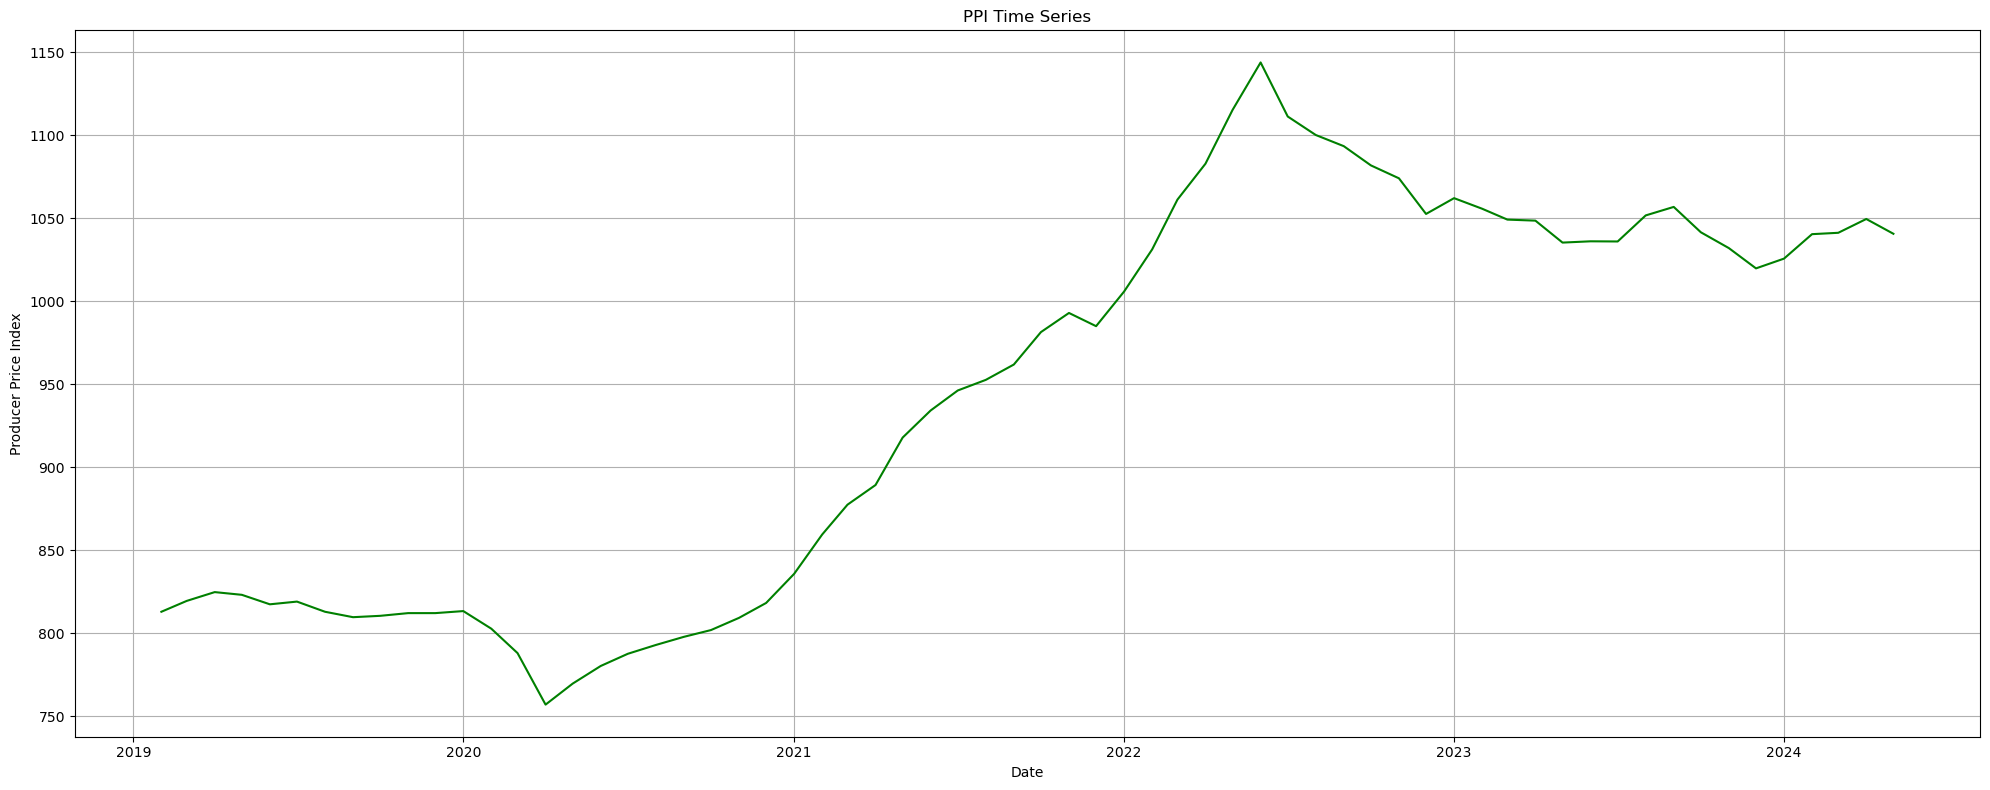

In [19]:
plt.figure(figsize=(20, 8))
plt.title('PPI Time Series')
plt.xlabel('Date')
plt.ylabel("Producer Price Index")
plt.plot(ppi, color="green")
plt.grid(True)
plt.tight_layout()

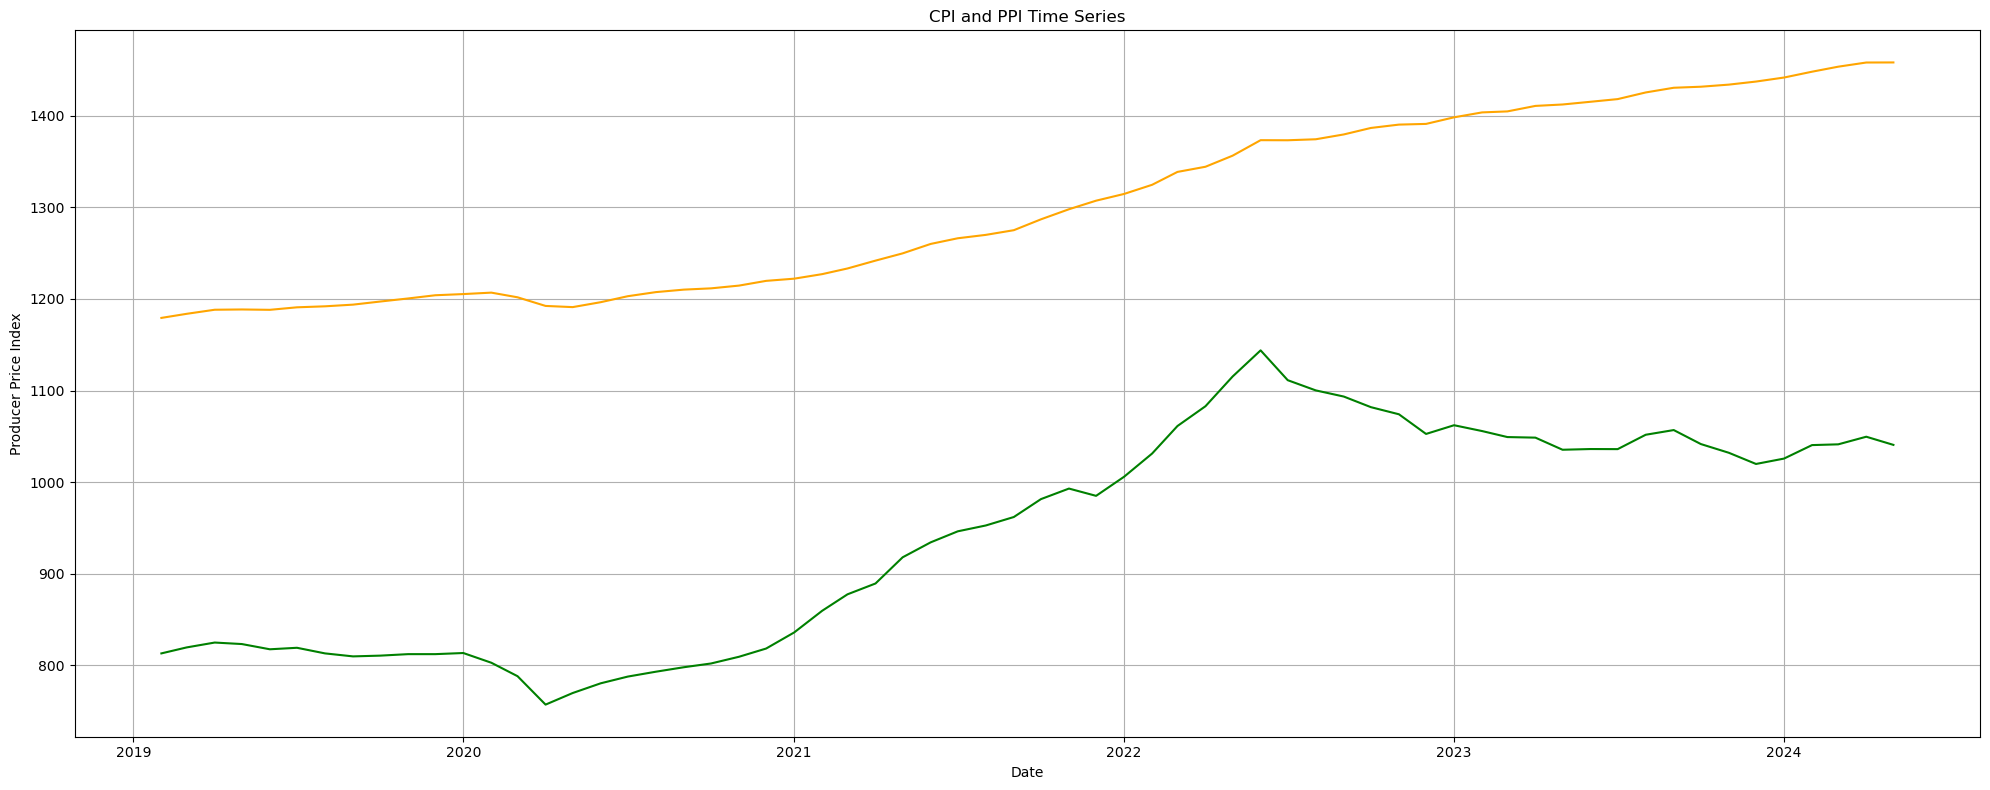

In [20]:
plt.figure(figsize=(20, 8))
plt.title('CPI and PPI Time Series')
plt.xlabel('Date')
plt.ylabel("Producer Price Index")
plt.plot(ppi, color="green")
plt.plot(cpi, color="orange")
plt.grid(True)
plt.tight_layout()

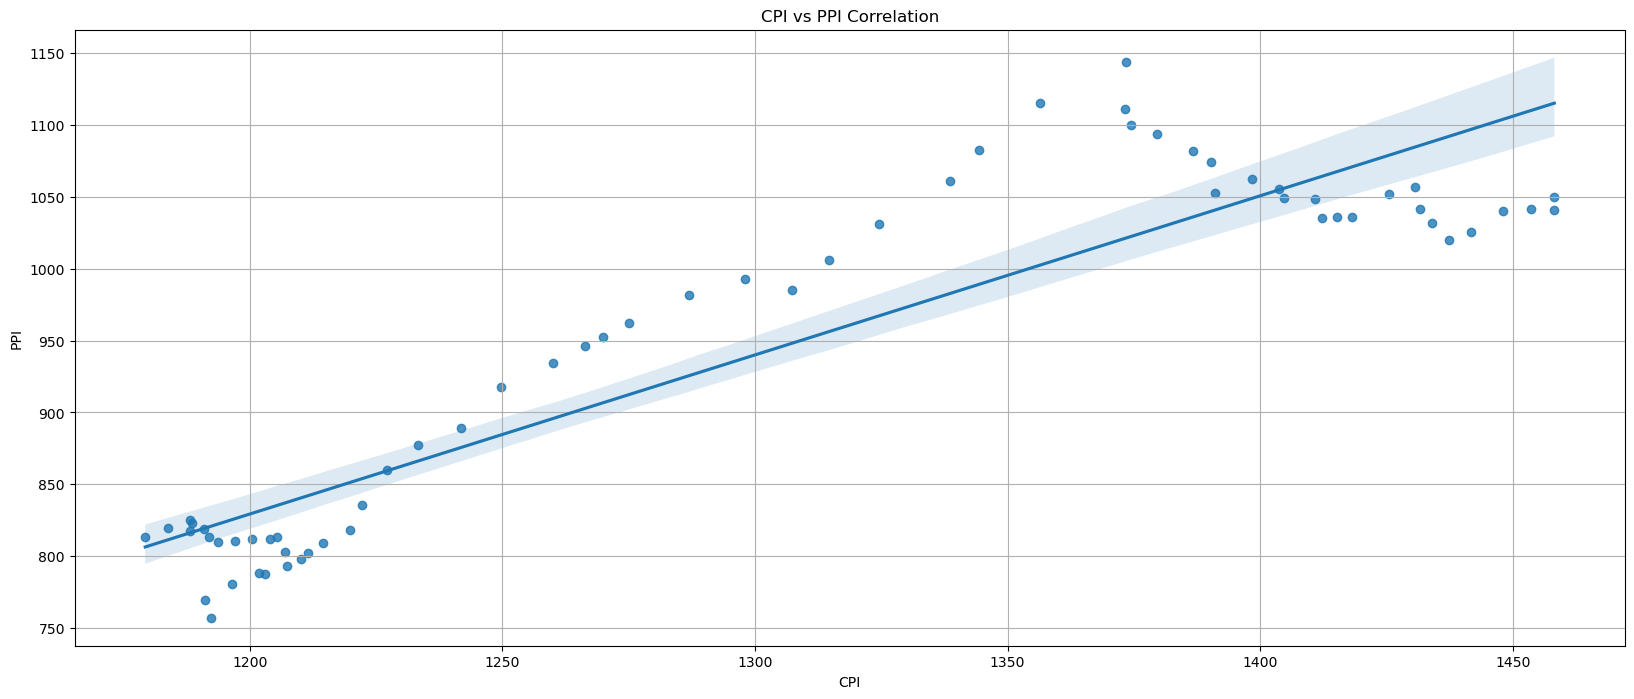

<Figure size 640x480 with 0 Axes>

In [21]:
plt.figure(figsize=(20, 8))
sns.regplot(data=df_mod, x='CPI', y='PPI')
plt.title('CPI vs PPI Correlation')
plt.grid(True)
plt.show()
plt.tight_layout()


In [22]:
cpi_ppi_cor = df_mod.corr()
cpi_ppi_cor


CPI       PPI
CPI  1.000000  0.911677
PPI  0.911677  1.000000

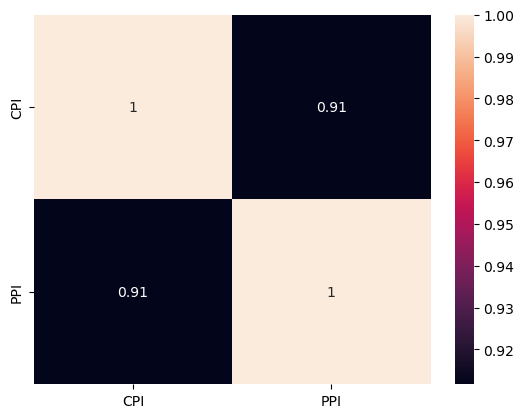

In [23]:
# drawing heatmap
sns.heatmap(cpi_ppi_cor, annot=True)
plt.show()

In [24]:
# find the CPI and PPI Rate
cpi_rate = cpi.pct_change().dropna()
ppi_rate = ppi.pct_change().dropna()

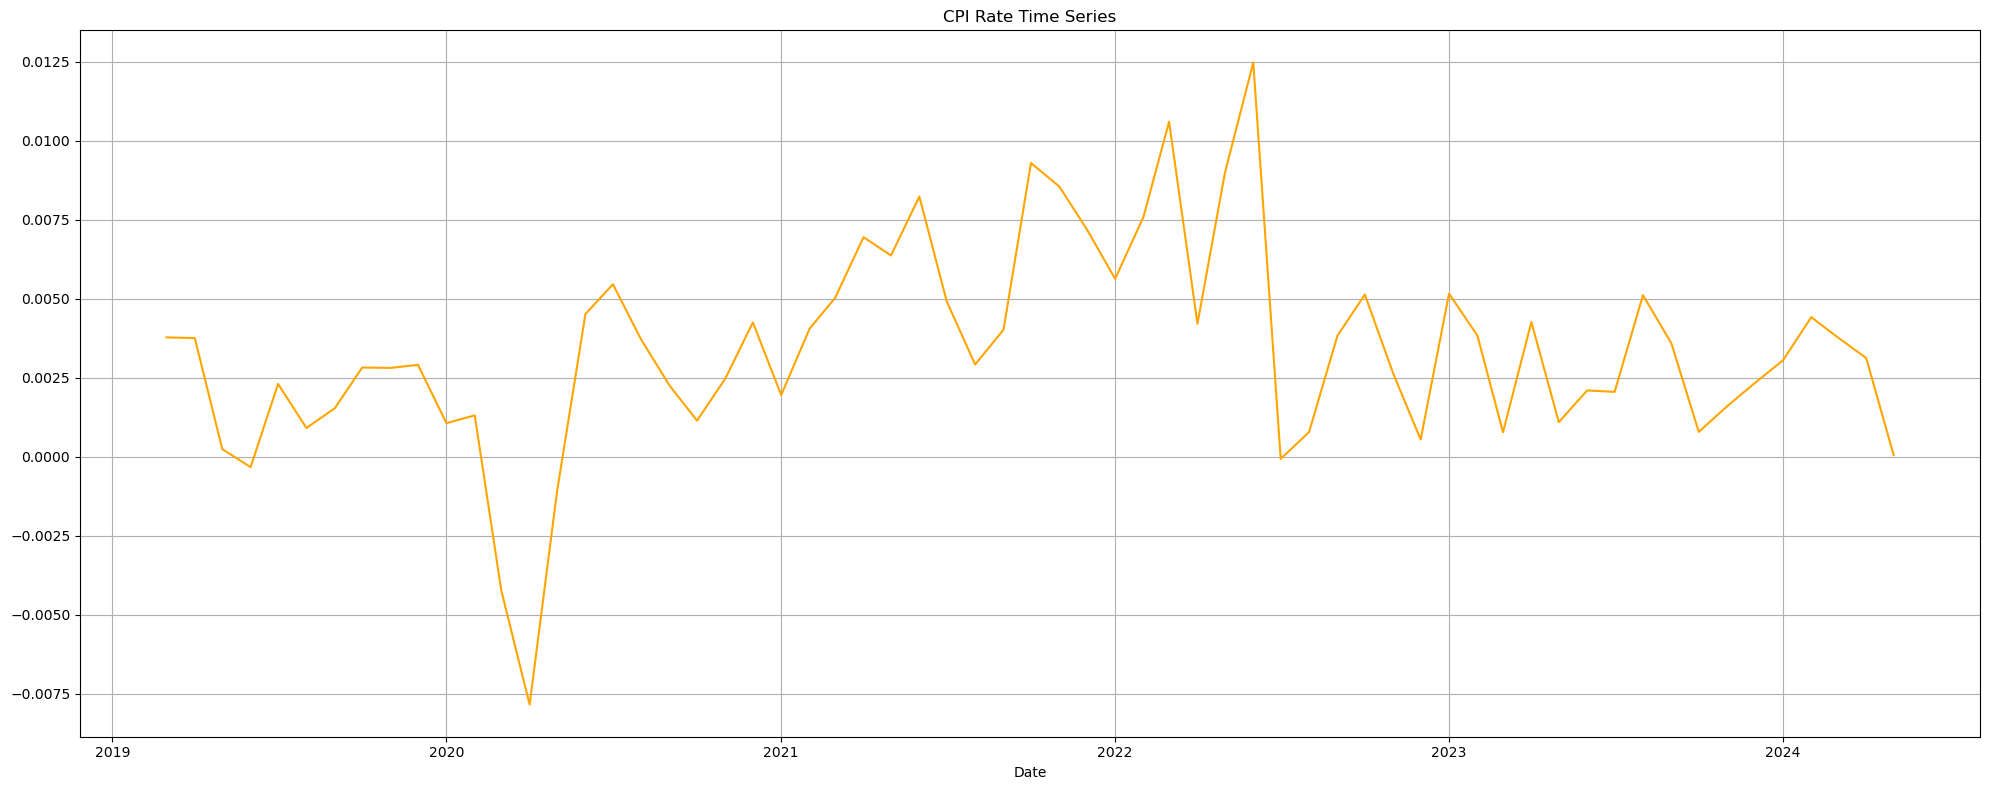

In [25]:
plt.figure(figsize=(20, 8))
plt.plot(cpi_rate, color='orange')
plt.title('CPI Rate Time Series')
plt.xlabel('Date')
plt.grid(True)
plt.tight_layout()
plt.show()

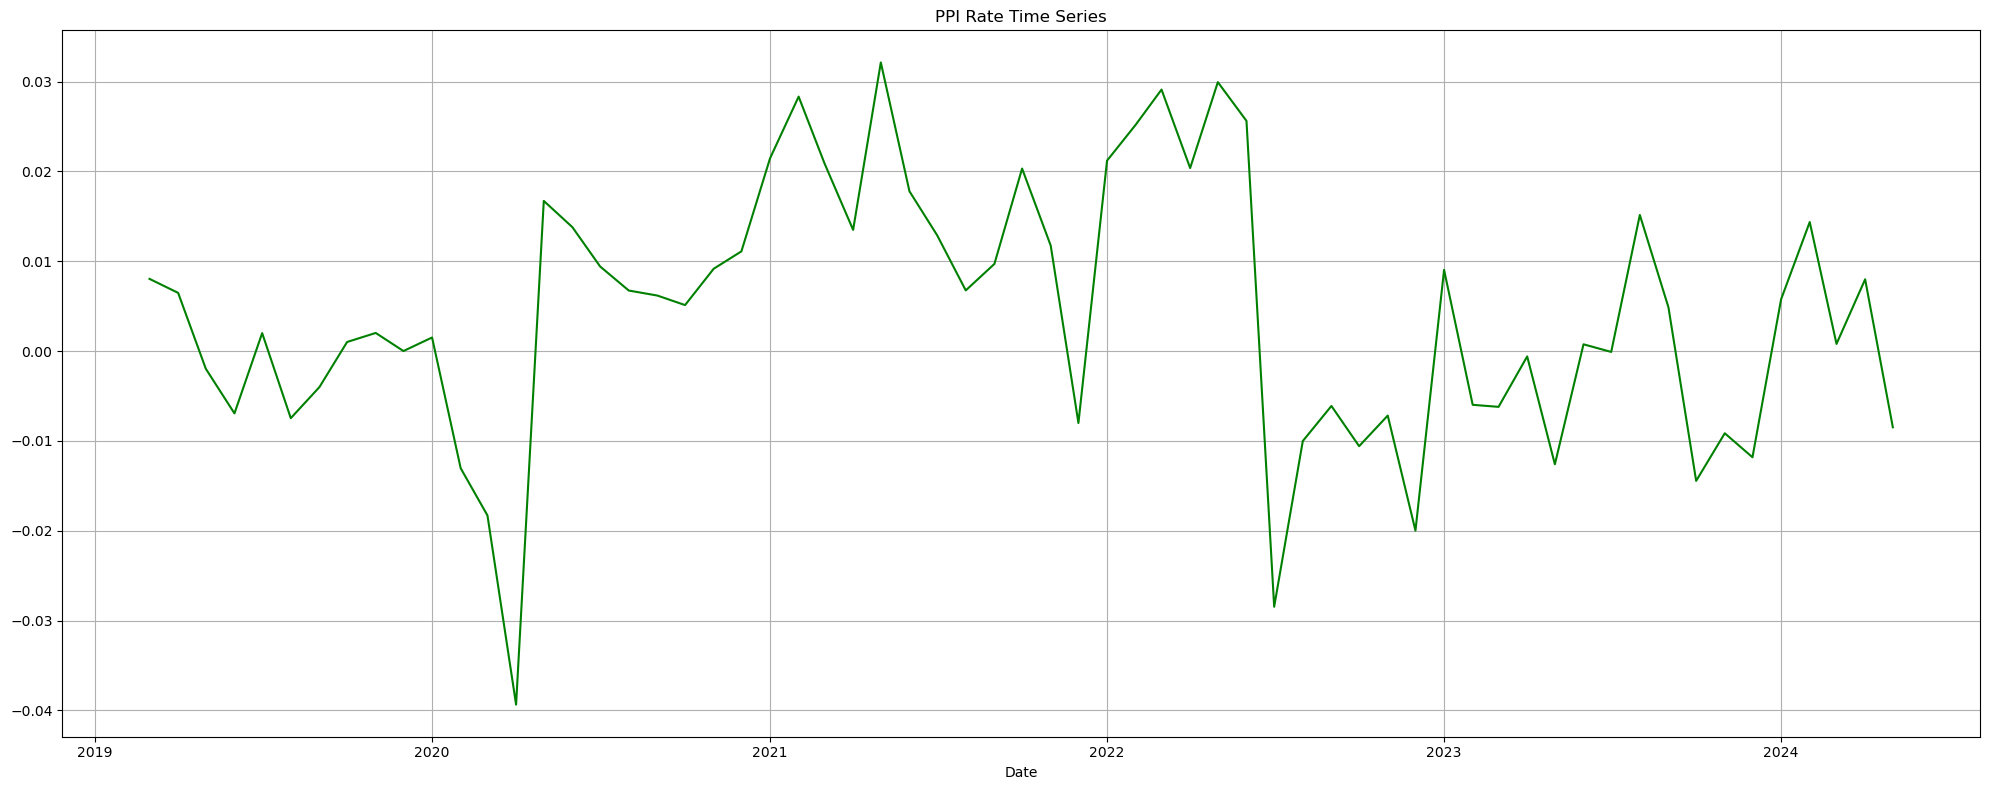

In [26]:
plt.figure(figsize=(20, 8))
plt.plot(ppi_rate, color='green')
plt.title('PPI Rate Time Series')
plt.xlabel('Date')
plt.grid(True)
plt.tight_layout()
plt.show()

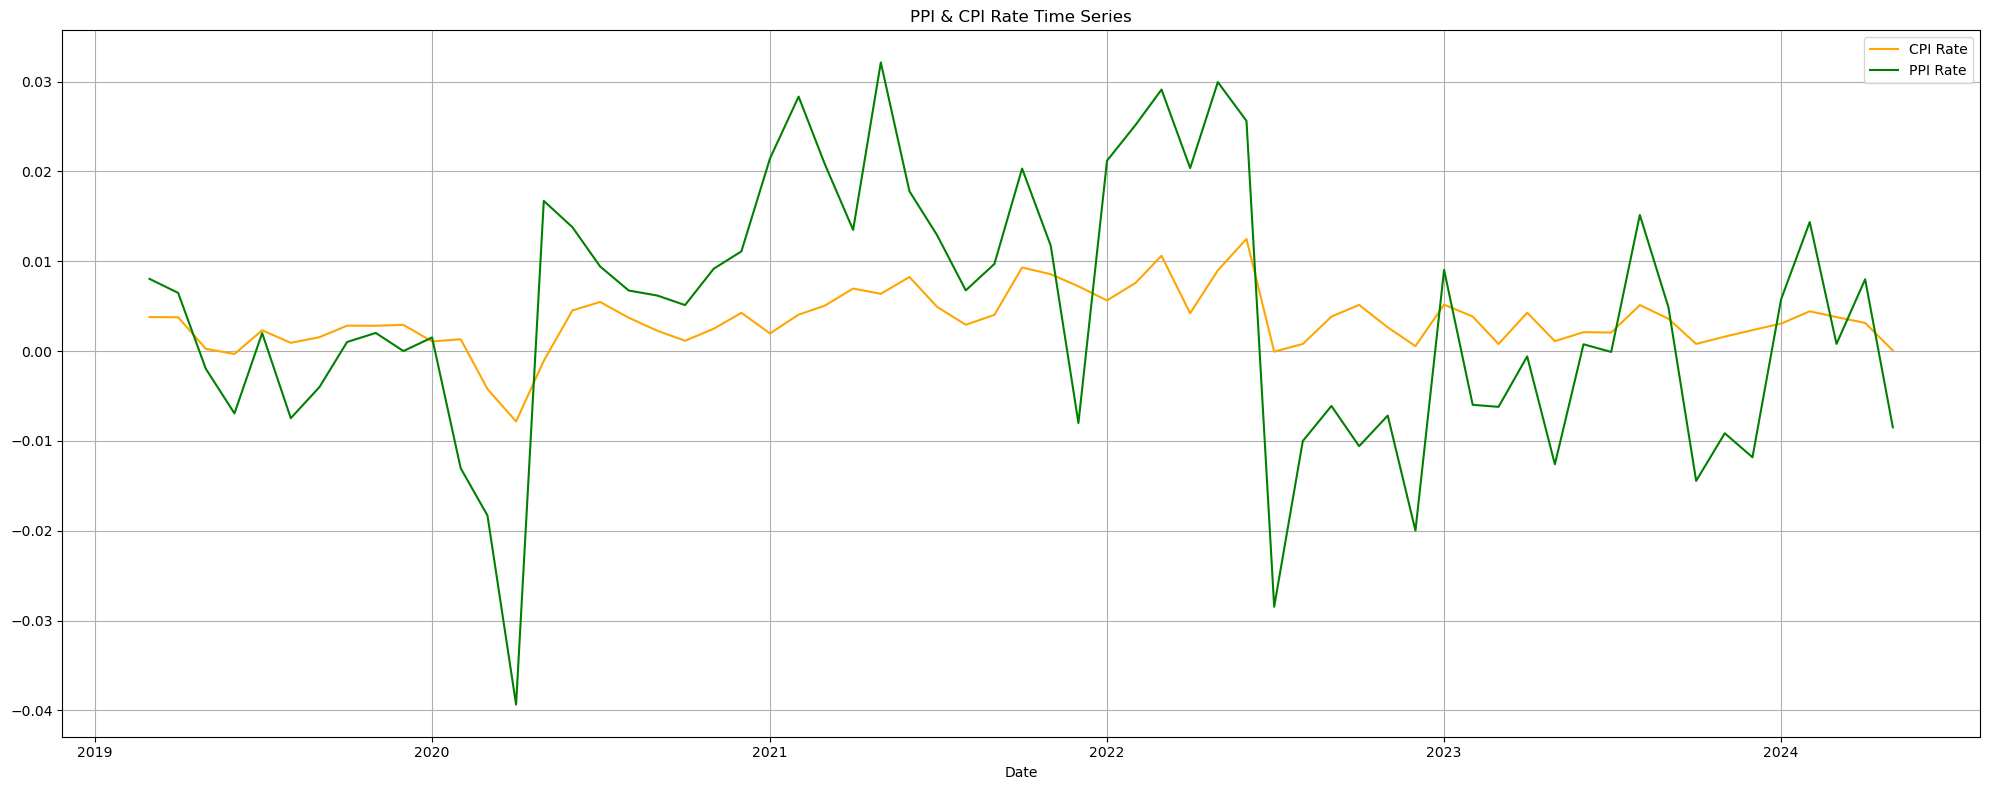

In [27]:
plt.figure(figsize=(20, 8))
plt.plot(cpi_rate, color='orange', label='CPI Rate')
plt.plot(ppi_rate, color='green', label='PPI Rate')
plt.title('PPI & CPI Rate Time Series')
plt.xlabel('Date')
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

In [28]:
df_cpi.rename(columns={'Date': 'ds','CPI':'y'}, inplace=True)

In [29]:
df_cpi.reset_index(drop=True)
df_cpi

ds           y         PPI
1273 2019-02-01  1179.32495   813.06122
1274 2019-03-01  1183.78492   819.59184
1275 2019-04-01  1188.23557   824.89796
1276 2019-05-01  1188.52886   823.26531
1277 2019-06-01  1188.14246   817.55102
...         ...         ...         ...
1332 2024-01-01  1441.73650  1025.73878
1333 2024-02-01  1448.10987  1040.46531
1334 2024-03-01  1453.58473  1041.28980
1335 2024-04-01  1458.13315  1049.60408
1336 2024-05-01  1458.21695  1040.69796

[64 rows x 3 columns]

In [30]:
from prophet import Prophet


In [31]:
ml = Prophet()

In [32]:
ml.fit(df_cpi)

14:11:04 - cmdstanpy - INFO - Chain [1] start processing
14:11:04 - cmdstanpy - INFO - Chain [1] done processing


In [33]:
future = ml.make_future_dataframe(periods=12, freq='MS')

In [34]:
future.tail()

ds
71 2025-01-01
72 2025-02-01
73 2025-03-01
74 2025-04-01
75 2025-05-01

In [35]:
result = ml.predict(future)
result

ds        trend   yhat_lower   yhat_upper  trend_lower  \
0  2019-02-01  1180.279341  1178.537178  1181.597747  1180.279341   
1  2019-03-01  1182.572346  1182.020699  1184.993588  1182.572346   
2  2019-04-01  1185.111030  1185.861221  1188.803247  1185.111030   
3  2019-05-01  1186.948525  1186.548598  1189.541446  1186.948525   
4  2019-06-01  1188.847270  1187.623738  1190.640582  1188.847270   
..        ...          ...          ...          ...          ...   
71 2025-01-01  1492.925196  1460.237404  1519.001838  1460.428134   
72 2025-02-01  1497.029906  1458.104883  1530.010503  1458.445421   
73 2025-03-01  1500.737385  1455.677268  1541.149686  1455.332302   
74 2025-04-01  1504.842095  1451.545328  1551.078184  1450.970142   
75 2025-05-01  1508.814395  1446.323251  1561.860497  1448.066667   

    trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0   1180.279341       -0.185137             -0.185137             -0.185137   
1   1182.572346        0.901888              0.901888              0.901888   
2   1185.111030        2.201548              2.201548              2.201548   
3   1186.948525        1.100487              1.100487              1.100487   
4   1188.847270        0.243024              0.243024              0.243024   
..          ...             ...                   ...                   ...   
71  1520.303207       -1.025303             -1.025303             -1.025303   
72  1530.663287       -0.609846             -0.609846             -0.609846   
73  1540.228223        1.087643              1.087643              1.087643   
74  1550.809630        0.464726              0.464726              0.464726   
75  1562.197301       -0.762900             -0.762900             -0.762900   

      yearly  yearly_lower  yearly_upper  multiplicative_terms  \
0  -0.185137     -0.185137     -0.185137                   0.0   
1   0.901888      0.901888      0.901888                   0.0   
2   2.201548      2.201548      2.201548                   0.0   
3   1.100487      1.100487      1.100487                   0.0   
4   0.243024      0.243024      0.243024                   0.0   
..       ...           ...           ...                   ...   
71 -1.025303     -1.025303     -1.025303                   0.0   
72 -0.609846     -0.609846     -0.609846                   0.0   
73  1.087643      1.087643      1.087643                   0.0   
74  0.464726      0.464726      0.464726                   0.0   
75 -0.762900     -0.762900     -0.762900                   0.0   

    multiplicative_terms_lower  multiplicative_terms_upper         yhat  
0                          0.0                         0.0  1180.094205  
1                          0.0                         0.0  1183.474234  
2                          0.0                         0.0  1187.312579  
3                          0.0                         0.0  1188.049012  
4                          0.0                         0.0  1189.090294  
..                         ...                         ...          ...  
71                         0.0                         0.0  1491.899892  
72                         0.0                         0.0  1496.420059  
73                         0.0                         0.0  1501.825028  
74                         0.0                         0.0  1505.306821  
75                         0.0                         0.0  1508.051495  

[76 rows x 16 columns]

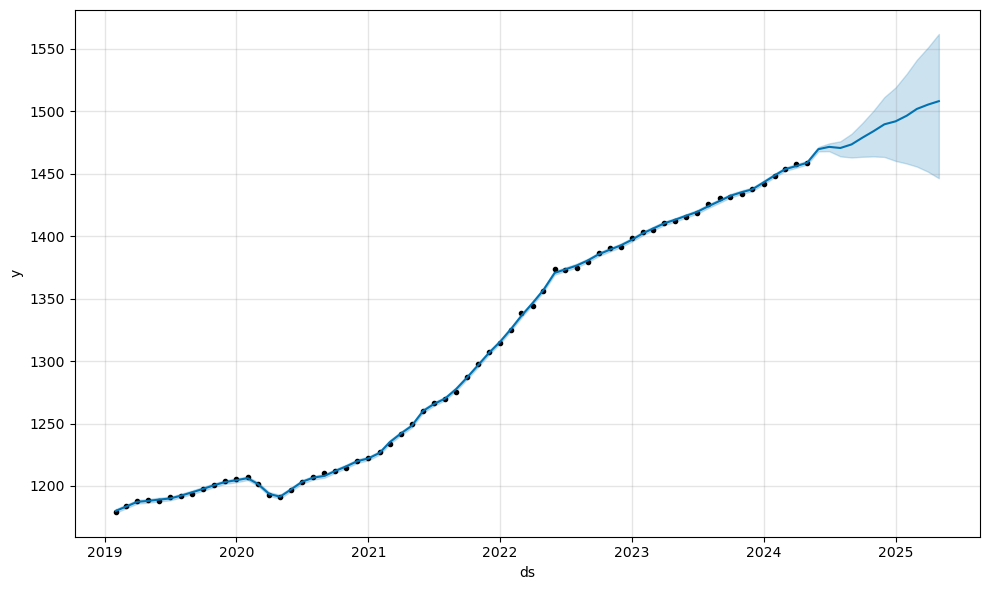

In [36]:
fig1 = ml.plot(result)

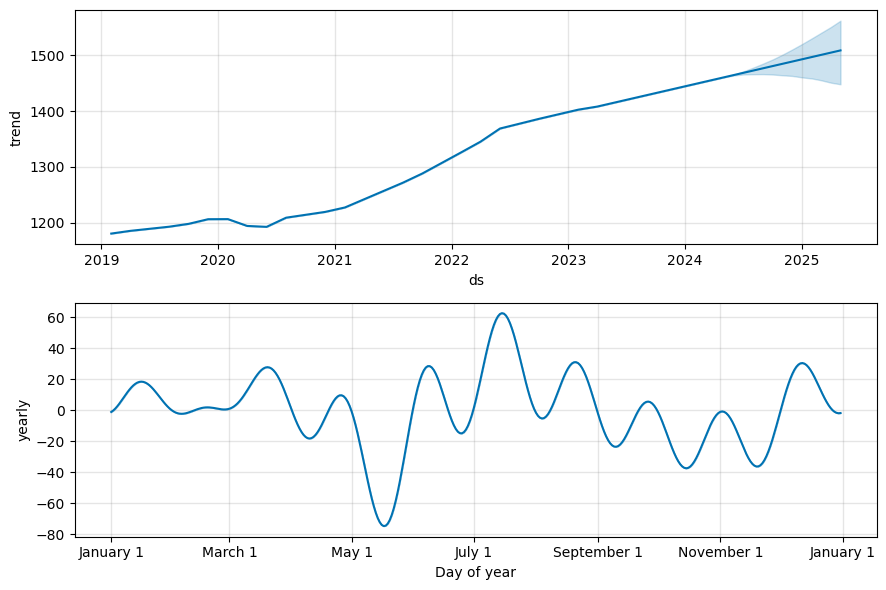

In [37]:

fig2 = ml.plot_components(result)



In [38]:
from prophet.plot import plot_plotly, plot_components_plotly
plot_plotly(ml, result)